# Find All Combs

In [61]:
import pandas as pd
comb_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/Combinations/AllComb_with_DCID.csv",header=None)
comb_df

,0,1,2
0,DC000269,DCC0097,DCC0318
1,DC000269,DCC0285,DCC0318
2,DC000269,DCC0097,DCC0285
3,DC000270,DCC0124,DCC0279
4,DC000271,DCC0133,DCC0309
...,...,...,...
2712,DC005450,DCC0161,DCC1200
2713,DC005450,DCC0179,DCC1200
2714,DC005463,DCC0156,DCC0241
2715,DC005463,DCC0156,DCC1351


In [62]:
#delete duplicate combinations --> 1867
comb_df=comb_df.drop_duplicates(subset = [1,2])

,0,1,2
0,DC000269,DCC0097,DCC0318
1,DC000269,DCC0285,DCC0318
2,DC000269,DCC0097,DCC0285
3,DC000270,DCC0124,DCC0279
4,DC000271,DCC0133,DCC0309
...,...,...,...
2712,DC005450,DCC0161,DCC1200
2713,DC005450,DCC0179,DCC1200
2714,DC005463,DCC0156,DCC0241
2715,DC005463,DCC0156,DCC1351


In [70]:
comb_df=comb_df.assign(EFFICACY='')
for k,i in comb_df.iterrows():   
    print(i[0])
    comb_df.loc[k,'EFFICACY']=comb_eff_df[comb_eff_df['DC_ID']==i[0]].EFFICACY.to_list()[0]
    #DC_TO_DCU_df2.loc[k,'DCC_ID']=DC_df[DC_df['DC_ID']==i[0]].DCC_ID.to_list()[0]
comb_df

DC000269
DC000269
DC000269
DC000270
DC000271
DC000272
DC000273
DC000274


IndexError: list index out of range

In [72]:
#comb_df.loc[k,'EFFICACY']=comb_eff_df[comb_eff_df['DC_ID']=='DC000274'].EFFICACY.to_list()[0]
comb_eff_df[comb_eff_df['DC_ID']=='DC000274']

,Unnamed: 0,DC_ID,EFFICACY,DCC_ID


In [66]:
len(list(set(comb_df[0]) & set(comb_eff_df['DC_ID']))) #1363

1290

In [84]:
import pandas as pd
comb_eff_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/Combinations/AllComb_with_DCID_withEFFICACY.csv',header=None)
comb_eff_df

,0,1,2,3
0,DC000001,DCC0005,DCC0193,Efficacious
1,DC000001,DCC0005,DCC0257,Efficacious
2,DC000001,DCC0193,DCC0257,Efficacious
3,DC000002,DCC0199,DCC0216,Efficacious
4,DC000003,DCC0140,DCC0186,Efficacious
...,...,...,...,...
2569,DC007320,DCC1853,DCC1861,Efficacious
2570,DC007321,DCC1256,DCC1854,Efficacious
2571,DC007321,DCC1256,DCC1855,Efficacious
2572,DC007321,DCC1854,DCC1855,Efficacious


In [106]:
comb_eff_df=comb_eff_df.drop_duplicates(subset = [1,2])
comb_eff_df

,0,1,2,3
0,DC000001,DCC0005,DCC0193,Efficacious
1,DC000001,DCC0005,DCC0257,Efficacious
2,DC000001,DCC0193,DCC0257,Efficacious
3,DC000002,DCC0199,DCC0216,Efficacious
4,DC000003,DCC0140,DCC0186,Efficacious
...,...,...,...,...
2568,DC007320,DCC0155,DCC1861,Efficacious
2569,DC007320,DCC1853,DCC1861,Efficacious
2571,DC007321,DCC1256,DCC1855,Efficacious
2572,DC007321,DCC1854,DCC1855,Efficacious


In [91]:
from collections import Counter 
Counter(comb_eff_df[3])

Counter({'Efficacious': 1419,
         'Non-efficacious': 277,
         'Need further study': 129})

In [112]:
#comb_eff_df[[1,2]]
comb_eff_df[comb_eff_df[3]=='Efficacious'][[1,2]].drop_duplicates().to_csv('C:/Users/user/Desktop/DCDB/DataSet/AllCombs_WithEFFICACY.csv')

In [98]:
#create input on NN
inp=[]
comb_df=comb_eff_df[comb_eff_df[3]!='Efficacious'][[1,2]]
for index,comb in comb_df.iterrows():
    #print(comb[0],comb[1])
    if comb[1] in list(df_drugs.index) and comb[2] in list(df_drugs.index):
        #print(df.loc[comb[0],'vector'])
        #print([n for n in ast.literal_eval(df.loc[comb[0],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[1],'vector'])])
        #print(comb[0],comb[1])
        inp.append([n for n in ast.literal_eval(df_drugs.loc[comb[1],'vector'])]+[n for n in ast.literal_eval(df_drugs.loc[comb[2],'vector'])])
print(len(inp))

96


# -----------------------------

In [51]:
#create vector of each drug
import pandas as pd
comb_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/Combinations/TwoComb.txt",delimiter="\t",header=None)
comb_df

,0,1
0,DCC0124,DCC0279
1,DCC0133,DCC0309
2,DCC0191,DCC0456
3,DCC0012,DCC0323
4,DCC0197,DCC0201
...,...,...
941,DCC0335,DCC1479
942,DCC0073,DCC0169
943,DCC0011,DCC1143
944,DCC0304,DCC1110


In [52]:
import pandas as pd
Target_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/Drugs_Targets_Onehot.csv').set_index('DCC_ID')#370
side_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/sideEffectVec.csv').set_index('DCC_ID')#389
finger_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/Drug_finger.csv").set_index('DCC_ID')#627
indication_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/indicationsVec.csv").set_index('DCC_ID')#383
word2vec_df = pd.read_pickle("C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/word2vecVect").set_index('DCC_ID')#614
Node2vec_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/Vectors/Node2Vec_DCC.csv").set_index('DCC_ID')#752

In [4]:
word2vec_df

,Name,vector
DCC_ID,,
DCC1838,Methyclothiazide,"[-0.397689, 0.11001712, -0.012883192, -0.34168..."
DCC0520,Betaine,"[0.52532125, 1.6732941, -0.16197257, -0.961683..."
DCC0029,Lovastatin,"[2.1933796, 0.3951249, 0.6225708, 0.55868375, ..."
DCC0030,Nevirapine,"[1.4135665, -1.503313, -0.8670802, 2.4341788, ..."
DCC0031,Butalbital,"[-0.7160798, -0.7595917, 0.9164073, -0.5664437..."
...,...,...
DCC0239,Salmeterol,"[-1.3627259, 0.66604817, 0.8932502, 4.6509895,..."
DCC0148,Imatinib,"[-2.0330389, 2.789069, -0.46384394, 2.5372677,..."
DCC0149,Triamcinolone,"[0.40282965, -0.9921588, 1.7708117, 0.6527391,..."


In [53]:
#index intersection
d=[list(Target_df.index),list(word2vec_df.index),list(Node2vec_df.index),list(finger_df.index),list(indication_df.index),list(side_df.index)]

sets = iter(map(set, d))
#print(sets)
inter = next(sets)
print(len(inter))
for s in sets:
    inter = inter.intersection(s)
    print(len(inter))
len(inter)

760
591
521
479
296
295


295

In [54]:
#get vector of each drug
import numpy as np
import ast
keys=list(inter)
a = np.zeros(shape=(len(keys),1))
df_drugs = pd.DataFrame(a,columns=['vector'])
df_drugs.index=keys
for drug in list(df_drugs.index):
    #[Target,finger,Node2vec,word2vec,side,indication]
    #790 167 128 200 3256 1513
    lst=list(Target_df.loc[drug])+[int(n) for n in ast.literal_eval(finger_df.loc[drug]['fingerPrints'])]+[float(n) for n in ast.literal_eval(Node2vec_df.loc[drug]['Node2Vec'])+list(word2vec_df.loc[drug]['vector'])]+list(side_df.loc[drug])+list(indication_df.loc[drug])
    #print(len(list(Target_df.loc[drug])),len([int(n) for n in ast.literal_eval(finger_df.loc[drug]['fingerPrints'])]),len([float(n) for n in ast.literal_eval(Node2vec_df.loc[drug]['Node2Vec'])]),len(list(word2vec_df.loc[drug]['vector'])),len(list(side_df.loc[drug])),len(list(indication_df.loc[drug])))
    df_drugs.loc[drug,'vector']=str(lst)
df_drugs

,vector
DCC0088,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0185,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0314,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0092,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
DCC0315,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0215,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0319,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
DCC0022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [73]:
#create pos input exist in df 
def get_pos(df):
    inp=[]
    inp_rev=[]
    inp_drugs=[]
    inp_drugs_rev=[]
    for index,comb in comb_df.iterrows():
        if comb[0] in list(df.index) and comb[1] in list(df.index):
            #print(df.loc[comb[0],'vector'])
            #print([n for n in ast.literal_eval(df.loc[comb[0],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[1],'vector'])])
            #print(comb[0],comb[1])
            inp.append([n for n in ast.literal_eval(df.loc[comb[0],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[1],'vector'])])
            inp_rev.append([n for n in ast.literal_eval(df.loc[comb[1],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[0],'vector'])])
            inp_drugs.append((comb[0],comb[1]))
            inp_drugs_rev.append((comb[1],comb[0]))
    print(len(inp),len(inp_rev))
    return inp,inp_rev,inp_drugs,inp_drugs_rev

In [74]:
# create negetive input on NN
import random
def getPair(Rlist):
    random_num1 = random.choice(Rlist)
    random_num2 = random.choice(Rlist)
    while random_num1==random_num2:
        random_num2 = random.choice(Rlist)
    return sorted([random_num1,random_num2])

#create negatives samples
def createNeg(df,sampleSize):
    negSam=[]
    #sampleSize=1000#len(inp) #<=================
    while len(negSam)<sampleSize:
        pair=getPair(df.index)
        while pair in list(comb_df.values.tolist()) and pair[0] not in list(df.index) and pair[1] not in list(df.index):
           pair=getPair(df.index)
        negSam.append(pair)
        
    neginp,neginp_rev,neginp_drugs,neginp_drugs_rev=get_neg(negSam,df)
    
    return neginp,neginp_rev,neginp_drugs,neginp_drugs_rev
    #print(len(negSam))


def get_neg(negSam,df):
    #create negetive input on NN
    neginp,neginp_rev,neginp_drugs,neginp_drugs_rev=([] for i in range(4))
    
    for comb in negSam:
        #print(comb[0],comb[1])
        if comb[0] in list(df.index) and comb[1] in list(df.index):
            neginp.append([n for n in ast.literal_eval(df.loc[comb[0],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[1],'vector'])])
            neginp_rev.append([n for n in ast.literal_eval(df.loc[comb[1],'vector'])]+[n for n in ast.literal_eval(df.loc[comb[0],'vector'])])
            neginp_drugs.append((comb[0],comb[1]))
            neginp_drugs_rev.append((comb[1],comb[0]))
    #print(len(neginp),len(neginp_rev))
    return neginp,neginp_rev,neginp_drugs,neginp_drugs_rev

In [75]:
import itertools
import pandas as pd
import numpy as np
import itertools
import operator

def createNeg_leastSim(df,sampleSize):

    #get all pairs
    CL=list(itertools.combinations(list(df.index), 2))#create neg with 295 drugs
    CL=[sorted(i) for i in CL]#sort elements
    #print(len(CL))
    #delete combinations
    CL_fil=[]
    for i in CL:
        if i not in list(comb_df.values.tolist()):#delete combinations
            CL_fil.append(i)
    #print(len(CL_fil))

    Target_sim_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/New folder/Targets/TargetSimilarity.csv').set_index('DCC_ID')#370
    side_sim_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/New folder/sideEffectSimilarity.csv').set_index('DCC_ID')#389
    ATC_sim_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/New folder/ATC/ATCSimilarity.csv').set_index('DCC_ID')#374
    finger_sim_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/fingerSimilarity.csv").set_index('DCC_ID')#627
    indication_sim_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/indicationSimilarity.csv").set_index('DCC_ID')#383
    word2vec_sim_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/word2vecSimilarity.csv").set_index('DCC_ID')#614
    Node2vec_sim_df=pd.read_csv("C:/Users/user/Desktop/DCDB/DataSet/New folder/nod2vecSimilarity.csv").set_index('DCC_ID')#752

    d=[list(Target_sim_df.index),list(word2vec_sim_df.index),list(Node2vec_sim_df.index),list(finger_sim_df.index),list(indication_sim_df.index),list(side_sim_df.index)]

    #list(indication_df.index),list(Target_df.index),list(ATC_df.index),,list(finger_df.index),list(side_df.index),
    sets = iter(map(set, d))
    #print(sets)
    inter_sim = next(sets)
    #print(len(inter))
    for s in sets:
        inter_sim = inter_sim.intersection(s)
        print(len(inter_sim))
    #len(inter_sim)


    keys=list(inter_sim)
    a = np.zeros(shape=(len(keys),len(keys)))
    vec_df = pd.DataFrame(a,columns=keys)
    vec_df.index=keys
    for pair in list(itertools.combinations(list(vec_df.index), 2)):
        lst=float(Target_sim_df.loc[pair[0],pair[1]])+float(word2vec_sim_df.loc[pair[0],pair[1]])+float(Node2vec_sim_df.loc[pair[0],pair[1]])+float(side_sim_df.loc[pair[0],pair[1]])+float(indication_sim_df.loc[pair[0],pair[1]])+float(finger_sim_df.loc[pair[0],pair[1]])
        vec_df.loc[(pair[0],pair[1])]=str(lst)
        vec_df.loc[(pair[1],pair[0])]=str(lst) 
    
    CL_new=[]
    for i in CL_fil:
        CL_new.append((i[0],i[1],float(vec_df.loc[(i[0],i[1])])))

    #sort by sim
    CL_new=sorted(CL_new,key=operator.itemgetter(2))
    #get negSam
    negSam=[(i[0],i[1]) for i in CL_new[0:sampleSize]] 
    
    neginp,neginp_rev,neginp_drugs,neginp_drugs_rev=get_neg(negSam,df)
    
    return neginp,neginp_rev,neginp_drugs,neginp_drugs_rev

In [67]:
#repeate n time
def mlp_val(nTime,df_inp):
    acc_lst,pre_lst,rec_lst,f1_lst=([] for i in range(4))

    #pos sample
    inp,inp_rev,inp_drugs,inp_drugs_rev=get_pos(df_inp)

    for n in range(nTime):
        #neginp,neginp_rev,neginp_drugs,neginp_drugs_rev=createNeg(df_inp,2000)
        neginp,neginp_rev,neginp_drugs,neginp_drugs_rev=createNeg_leastSim(df_inp,2000)

        #X,y,X_drugs=get_data_aug_rep(inp,inp_rev,neginp,neginp_rev,inp_drugs,neginp_drugs)
        X,y,X_drugs=get_data_aug_rep2(inp,inp_rev,neginp,inp_drugs,inp_drugs_rev,neginp_drugs)
        
        #print(np.array(X).shape)
        
        f1,rec,pre,acc,FP_drugs=Mlp_Keras(X,y,X_drugs)
        acc_lst.append(acc)
        pre_lst.append(pre)
        rec_lst.append(rec)
        f1_lst.append(f1)
        
        print(FP_drugs)
        print("----------------------------------------------------------------------")
        
    print("----------------------------------------------------------------------")
    print("\nacc: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(acc_lst), numpy.std(acc_lst)))
    print("\nf1: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(f1_lst), numpy.std(f1_lst)))
    print("\nrec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(rec_lst), numpy.std(rec_lst)))
    print("\nprec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(pre_lst), numpy.std(pre_lst)))



In [76]:
def get_data_aug_rep(inp,inp_rev,neginp,neginp_rev,inp_drugs,inp_drugs_rev,neginp_drugs,neginp_drugs_rev):
    X = inp+neginp+inp+inp_rev+neginp_rev+inp_rev
    y =  [1] * len(inp)+[0]*len(neginp)+[1] * len(inp)+[1] * len(inp_rev)+[0]*len(neginp_rev)+[1] * len(inp_rev)
    X_drugs=inp_drugs+neginp_drugs+inp_drugs+inp_drugs_rev+neginp_drugs_rev+inp_drugs_rev
    return X,y,X_drugs

def get_data_aug_rep2(inp,inp_rev,neginp,inp_drugs,inp_drugs_rev,neginp_drugs):
    X = inp+neginp+inp+inp_rev+inp_rev
    y =  [1] * len(inp)+[0]*len(neginp)+[1] * len(inp)+[1] * len(inp_rev)+[1] * len(inp_rev)
    X_drugs=inp_drugs+neginp_drugs+inp_drugs+inp_drugs_rev+inp_drugs_rev
    return X,y,X_drugs

In [ ]:
mlp_val(1,df_drugs)

# Keras

In [78]:
#keras mlp 
import numpy
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from collections import Counter
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l1

def val(testy, yhat_classes):   
    accuracy = accuracy_score(testy, yhat_classes)
    precision = precision_score(testy, yhat_classes)
    recall = recall_score(testy, yhat_classes)
    f1 = f1_score(testy, yhat_classes)

    return accuracy,precision,recall,f1

def Mlp_Keras(X,y,X_drugs):
    SF =ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
    prec,rec,f1,acc=([] for i in range(4))
    pos_prec,pos_rec,pos_f1 =([] for i in range(3))

    FP_drugs=[]
    for train, test in SF.split(X, y):
        #print(train, test)
        X_train = list(map(X.__getitem__, train))
        X_test = list(map(X.__getitem__, test))
        y_train = np.asarray(list(map(y.__getitem__, train)))
        y_test = np.asarray(list(map(y.__getitem__, test)))
        
        X_train_drugs = list(map(X_drugs.__getitem__, train))
        X_test_drugs = list(map(X_drugs.__getitem__, test))
        
        #Scale data
        scale = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test = scale.transform(X_test)

        #print(Counter(y_train),Counter(y_test))

        X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=40)
        print(Counter(y_train),Counter(y_test),Counter(y_val))

        model = keras.Sequential()
        #1024,128,64
        model.add(layers.Dense(128, input_dim=len(X[0]), activation='relu'))
        model.add(Dropout(0.5))
        model.add(layers.Dense(64, activation='relu',activity_regularizer=l1(0.01)))
        model.add(Dropout(0.5))
        model.add(layers.Dense(16, activation='relu',activity_regularizer=l1(0.01)))
        model.add(Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid',activity_regularizer=l1(0.01)))

        callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)

        # Compile model
        opt = keras.optimizers.Adam(learning_rate=0.0001)
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        
        # Fit the model
        hist_mdl=model.fit(X_train2, y_train2, epochs=1000, batch_size=32, verbose=0,shuffle=True, validation_data=(X_val, y_val),callbacks=[callback])#,,validation_split=0.3,validation_data=(X_test, y_test)
        # evaluate the model
        #print(hist_mdl.history['val_loss'])
        val_loss,val_accuracy = model.evaluate(X_test, y_test, verbose=1)

        plt.figure()
        plt.plot(hist_mdl.history['loss'], label='train')
        plt.plot(hist_mdl.history['val_loss'], label='validation')
        plt.title('Autoencoder model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper right')
        plt.show()


        #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        #cvscores.append(scores[1] * 100)
        yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
        scores_res=val(y_test,yhat_classes)
        
        # plot history
        plt.plot(hist_mdl.history['accuracy'], label='train')
        plt.plot(hist_mdl.history['val_accuracy'], label='validation')
        plt.title('Autoencoder model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

        acc.append(scores_res[0])
        prec.append(scores_res[1])
        rec.append(scores_res[2])
        f1.append(scores_res[3])
        
        #Add Pos scores
        pos_scores_res=pre_rec_pos(y_test,yhat_classes)
        pos_prec.append(pos_scores_res[0])
        pos_rec.append(pos_scores_res[1])
        pos_f1.append(pos_scores_res[2])
    
        #Print FP samples

        for i in range(len(y_test)):
            #print(i)
            if y_test[i]==0 and yhat_classes[i]==1:
                print(X_test_drugs[i])
                FP_drugs.append(X_test_drugs[i])
        
    print("\nacc: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(acc), numpy.std(acc)))
    print("\nf1: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(f1), numpy.std(f1)))
    print("\nrec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(rec), numpy.std(rec)))
    print("\nprec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(prec), numpy.std(prec)))
    print("---------------------------------------------")
    print("\npos f1: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(pos_f1), numpy.std(pos_f1)))
    print("\npos rec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(pos_rec), numpy.std(pos_rec)))
    print("\npos prec: mean: %.2f%% std: (+/- %.2f%%)" % (numpy.mean(pos_prec), numpy.std(pos_prec)))
    
    return numpy.mean(f1),numpy.mean(rec),numpy.mean(prec),numpy.mean(acc),FP_drugs

In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def pre_rec_pos(y_test,yhat_classes):
    rec_indices = [i for i, x in enumerate(y_test) if x == 1]
    rec_yhat_classes = list(map(yhat_classes.__getitem__, rec_indices))
    rec_y_test = list(map(y_test.__getitem__, rec_indices))

    recall = recall_score(rec_y_test, rec_yhat_classes)
    #print("Recall: "+str(recall))
    
    pre_indices = [i for i, x in enumerate(yhat_classes) if x == 1]
    pre_yhat_classes = list(map(yhat_classes.__getitem__, pre_indices))
    pre_y_test = list(map(y_test.__getitem__, pre_indices))
    precision = precision_score(pre_y_test, pre_yhat_classes)
    #print("Precision: "+str(precision))
    FMeasure=(2 * precision * recall) / (precision + recall)
    #print("F-score: "+str(FMeasure))
    return [precision,recall,FMeasure]
    
#Test this function
#y_test=[1,0,0,1,1]
#yhat_classes=[0,0,0,1,1]
#pre_rec_pos(y_test,yhat_classes)

Recall: 0.6666666666666666
Precision: 1.0
F-score: 0.8


[1.0, 0.6666666666666666, 0.8]

In [45]:
a=[1,0,0,1]
b=[3,5,6,7]
#list(map(a.__getitem__, [1]))
indices = [i for i, x in enumerate(a) if x == 1]
res_list = list(map(b.__getitem__, indices))
list(res_list)

[3, 7]

# AutoEncoder Dim reduction

In [13]:
targetLst={}
fingerLst={}
indLst={}
word2vecLst={}
sideLst={}
for drug in inter:
    #finger = list(finger_df.loc[drug])[0][1:-1].split(',')
    #fingerL = [ int(x) for x in finger ]
    sideLst[drug]=list(side_df.loc[drug])
    #fingerLst[drug]=fingerL
    indLst[drug]=list(indication_df.loc[drug])
    targetLst[drug]=list(Target_df.loc[drug])
    #word2vecLst[drug]=list(word2vec_df.loc[drug])[0]
    # flat_list = [float(item) for sublist in lst for item in sublist]
    # data[drug]=flat_list
    # target[drug]=list(side_df.loc[drug])

In [14]:
import numpy as np
t=np.asarray(list(targetLst.values()))#790
i=np.asarray(list(indLst.values()))#1513
s=np.asarray(list(sideLst.values()))#3256

In [18]:
#------------------------------------Build the AutoEncoder------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

def autoencoder_feature(feature,encoding_dim,layers):
    train_x, test_x = train_test_split(feature, random_state=1)
    #Scale data
    scale = StandardScaler()
    train_x = scale.fit_transform(train_x)
    test_x = scale.transform(test_x)

    # Choose size of our encoded representations (we will reduce our initial features to this number)
    #encoding_dim = 200

    # Define input layer
    input_data = Input(shape=(train_x.shape[1],))


    # Define encoding layer
    encoded = Dense(layers[0], activation = 'relu')(input_data)
    encoded = Dense(layers[1], activation = 'relu')(encoded)
    encoded = Dense(layers[2], activation = 'relu')(encoded)
    encoded = Dense(encoding_dim, activation = 'relu')(encoded)
    #encoded = Dense(encoding_dim, activation='elu')(input_data)

    # Define decoding layer
    decoded = Dense(layers[2], activation = 'relu')(encoded)
    decoded = Dense(layers[1], activation = 'relu')(decoded)
    decoded = Dense(layers[0], activation = 'relu')(decoded)
    decoded = Dense(train_x.shape[1], activation = 'sigmoid')(decoded)

    #decoded = Dense(train_x.shape[1], activation='sigmoid')(encoded)
    # Create the autoencoder model
    autoencoder = Model(input_data, decoded)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',
                        loss='mae')
    #Fit to train set, validate with dev set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(train_x, train_x,
                    epochs=200,
                    batch_size=256,
                    shuffle=True)
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    # plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    autoencoder.summary()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder = Model(input_data, encoded)
    
    encoded_feature=encoder.predict(feature)
    
    return encoded_feature

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.5799
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 0.5703
Epoch 3/200
1/1 [==============================] - 0s 54ms/step - loss: 0.5390
Epoch 4/200
1/1 [==============================] - 0s 51ms/step - loss: 0.4608
Epoch 5/200
1/1 [==============================] - 0s 49ms/step - loss: 0.3277
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1885
Epoch 7/200
1/1 [==============================] - 0s 49ms/step - loss: 0.1098
Epoch 8/200
1/1 [==============================] - 0s 47ms/step - loss: 0.0883
Epoch 9/200
1/1 [==============================] - 0s 47ms/step - loss: 0.0850
Epoch 10/200
1/1 [==============================] - 0s 42ms/step - loss: 0.0848
Epoch 11/200
1/1 [==============================] - 0s 45ms/step - loss: 0.0848
Epoch 12/200
1/1 [==============================] - 0s 45ms/step - loss: 0.0848
Epoch 13/200
1/1 [==============================] -

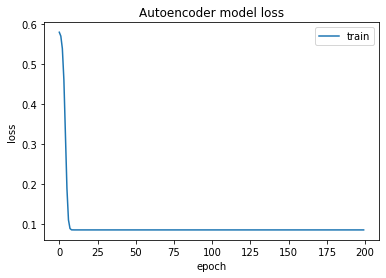

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 790)]             0         
_________________________________________________________________
dense_64 (Dense)             (None, 600)               474600    
_________________________________________________________________
dense_65 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_66 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_67 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_68 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_69 (Dense)             (None, 500)               1505

1/1 [==============================] - 0s 80ms/step - loss: 0.2800
Epoch 186/200
1/1 [==============================] - 0s 78ms/step - loss: 0.2800
Epoch 187/200
1/1 [==============================] - 0s 77ms/step - loss: 0.2800
Epoch 188/200
1/1 [==============================] - 0s 76ms/step - loss: 0.2800
Epoch 189/200
1/1 [==============================] - 0s 78ms/step - loss: 0.2800
Epoch 190/200
1/1 [==============================] - 0s 79ms/step - loss: 0.2800
Epoch 191/200
1/1 [==============================] - 0s 76ms/step - loss: 0.2800
Epoch 192/200
1/1 [==============================] - 0s 77ms/step - loss: 0.2800
Epoch 193/200
1/1 [==============================] - 0s 80ms/step - loss: 0.2800
Epoch 194/200
1/1 [==============================] - 0s 79ms/step - loss: 0.2800
Epoch 195/200
1/1 [==============================] - 0s 80ms/step - loss: 0.2800
Epoch 196/200
1/1 [==============================] - 0s 78ms/step - loss: 0.2800
Epoch 197/200
1/1 [=======================

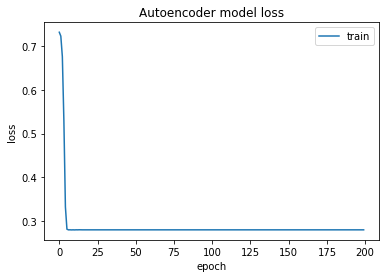

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3256)]            0         
_________________________________________________________________
dense_72 (Dense)             (None, 1000)              3257000   
_________________________________________________________________
dense_73 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_74 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_75 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_76 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_77 (Dense)             (None, 500)               1505

1/1 [==============================] - 0s 51ms/step - loss: 0.1678
Epoch 186/200
1/1 [==============================] - 0s 51ms/step - loss: 0.1678
Epoch 187/200
1/1 [==============================] - 0s 50ms/step - loss: 0.1678
Epoch 188/200
1/1 [==============================] - 0s 50ms/step - loss: 0.1678
Epoch 189/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1678
Epoch 190/200
1/1 [==============================] - 0s 49ms/step - loss: 0.1678
Epoch 191/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1678
Epoch 192/200
1/1 [==============================] - 0s 49ms/step - loss: 0.1678
Epoch 193/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1678
Epoch 194/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1678
Epoch 195/200
1/1 [==============================] - 0s 47ms/step - loss: 0.1678
Epoch 196/200
1/1 [==============================] - 0s 47ms/step - loss: 0.1678
Epoch 197/200
1/1 [=======================

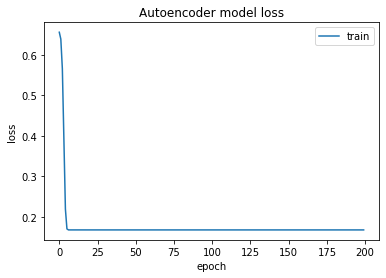

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1513)]            0         
_________________________________________________________________
dense_80 (Dense)             (None, 1000)              1514000   
_________________________________________________________________
dense_81 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_82 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_83 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_84 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_85 (Dense)             (None, 500)               150

(295, 600)

In [20]:
encodedt=autoencoder_feature(t,200,[600,500,300])
encodeds=autoencoder_feature(s,200,[1000,500,300])
encodedi=autoencoder_feature(i,200,[1000,500,300])

newX = np.concatenate((encodedt,encodeds,encodedi), axis=1)
newX.shape

In [21]:
#get vector of each drug
import numpy as np
import ast
keys=list(inter)
a = np.zeros(shape=(len(keys),1))
df_drugs_enc = pd.DataFrame(a,columns=['vector'])
df_drugs_enc.index=keys
for drug in list(df_drugs_enc.index):
    #[Target,finger,Node2vec,word2vec,side,indication]
    lst=list(newX[list(df.index).index(drug)])+[int(n) for n in ast.literal_eval(finger_df.loc[drug]['fingerPrints'])]+[float(n) for n in ast.literal_eval(Node2vec_df.loc[drug]['Node2Vec'])+list(word2vec_df.loc[drug]['vector'])]
    #print(len(lst))
    #print(len(list(Target_df.loc[drug])),len([int(n) for n in ast.literal_eval(finger_df.loc[drug]['fingerPrints'])]),len([float(n) for n in ast.literal_eval(Node2vec_df.loc[drug]['Node2Vec'])]),len(list(word2vec_df.loc[drug]['vector'])),len(list(side_df.loc[drug])),len(list(indication_df.loc[drug])))
    #790 167 128 200 3256 1513
    #print(len(lst))
    df_drugs_enc.loc[drug,'vector']=str(lst)
    #   print(drug)
df_drugs_enc

,vector
DCC0335,"[3.228315, 0.0, 2.9741914, 0.0, 0.0, 0.0, 2.41..."
DCC0083,"[5.062868, 0.0, 4.6672664, 0.0, 0.0, 0.0, 3.76..."
DCC0155,"[4.2136216, 0.0, 3.9735653, 0.0, 0.0, 0.0, 3.1..."
DCC0026,"[3.430475, 0.0, 3.193637, 0.0, 0.0, 0.0, 2.556..."
DCC0217,"[3.6195328, 0.0, 3.3256807, 0.0, 0.0, 0.0, 2.6..."
...,...
DCC0347,"[5.738182, 0.0, 5.113355, 0.0, 0.0, 0.0, 4.274..."
DCC0320,"[4.071786, 0.0, 3.8013787, 0.0, 0.0, 0.0, 3.11..."
DCC0242,"[4.166013, 0.0, 3.8218205, 0.0, 0.0, 0.0, 3.09..."
DCC0126,"[3.8976786, 0.0, 3.6210363, 0.0, 0.0, 0.0, 2.9..."


204 204
336
302
299
295
295
(2816, 2190)
Counter({0: 1801, 1: 733}) Counter({0: 199, 1: 83}) Counter({0: 172, 1: 82})
9/9 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9894


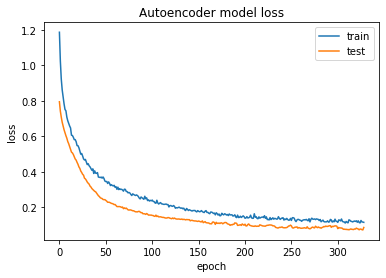

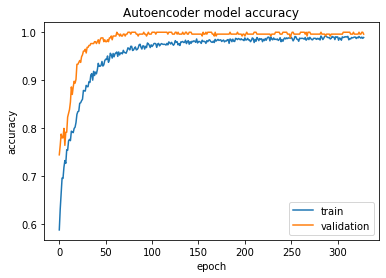

Recall: 0.9759036144578314
Precision: 0.9878048780487805
F-score: 0.9818181818181818
('DCC0204', 'DCC0240')
Counter({0: 1810, 1: 724}) Counter({0: 190, 1: 92}) Counter({0: 177, 1: 77})
9/9 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9894


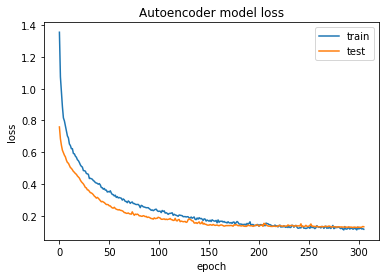

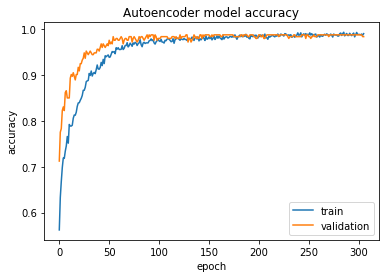

Recall: 0.967391304347826
Precision: 1.0
F-score: 0.9834254143646408
Counter({0: 1796, 1: 738}) Counter({0: 204, 1: 78}) Counter({0: 183, 1: 71})
9/9 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9894


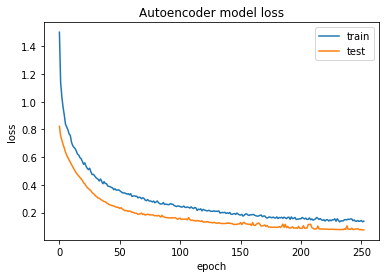

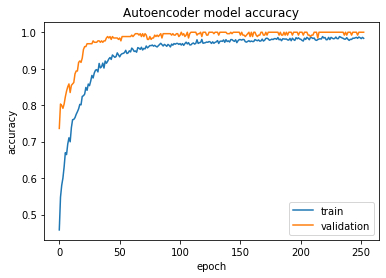

Recall: 0.9743589743589743
Precision: 0.987012987012987
F-score: 0.9806451612903225
('DCC0240', 'DCC0297')
Counter({0: 1796, 1: 738}) Counter({0: 204, 1: 78}) Counter({0: 176, 1: 78})
9/9 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9823


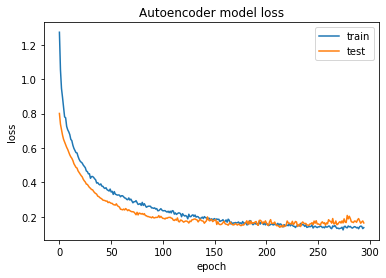

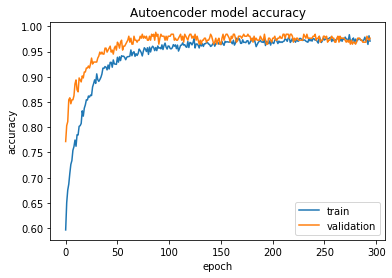

Recall: 0.9358974358974359
Precision: 1.0
F-score: 0.9668874172185431
Counter({0: 1803, 1: 731}) Counter({0: 197, 1: 85}) Counter({0: 190, 1: 64})
9/9 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9858


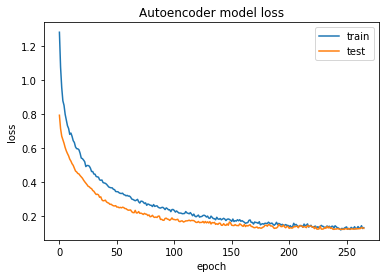

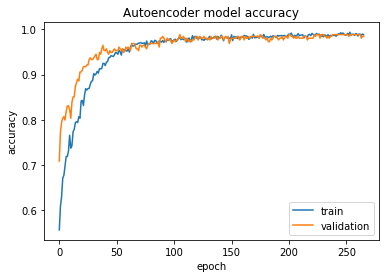

Recall: 0.9529411764705882
Precision: 1.0
F-score: 0.9759036144578312
Counter({0: 1793, 1: 741}) Counter({0: 207, 1: 75}) Counter({0: 170, 1: 84})
9/9 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9823


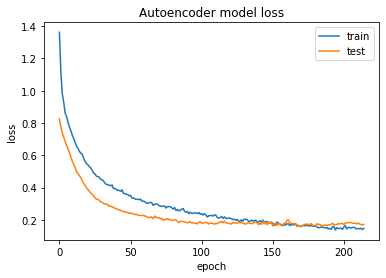

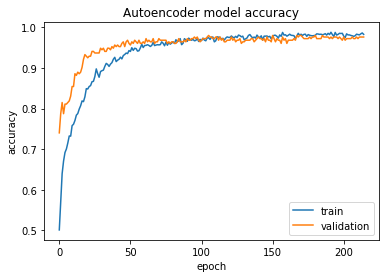

Recall: 0.9333333333333333
Precision: 1.0
F-score: 0.9655172413793104
Counter({0: 1797, 1: 737}) Counter({0: 203, 1: 79}) Counter({0: 187, 1: 67})
9/9 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9929


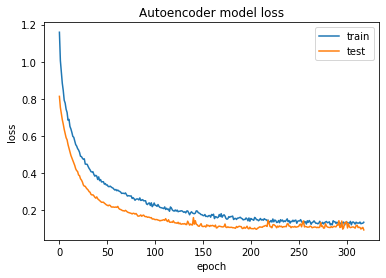

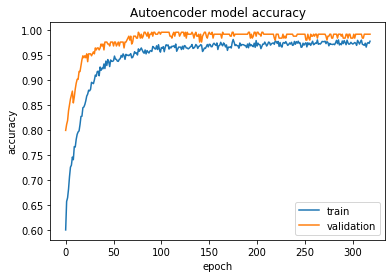

Recall: 0.9746835443037974
Precision: 1.0
F-score: 0.9871794871794872
Counter({0: 1807, 1: 727}) Counter({0: 193, 1: 89}) Counter({0: 173, 1: 81})
9/9 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9894


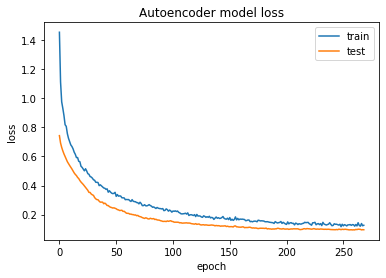

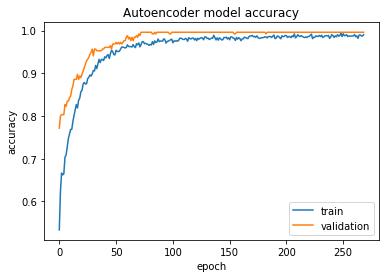

Recall: 0.9662921348314607
Precision: 1.0
F-score: 0.9828571428571428
Counter({0: 1803, 1: 731}) Counter({0: 197, 1: 85}) Counter({0: 201, 1: 53})
9/9 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9894


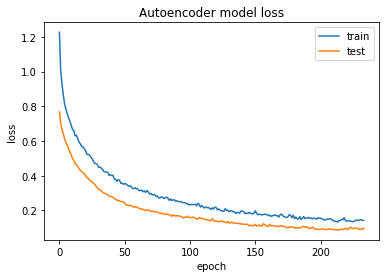

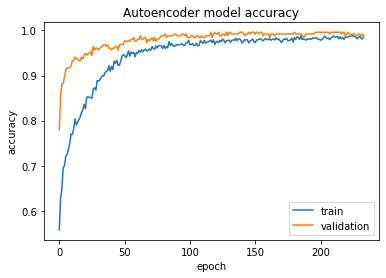

Recall: 0.9647058823529412
Precision: 1.0
F-score: 0.9820359281437125
Counter({0: 1810, 1: 724}) Counter({0: 190, 1: 92}) Counter({0: 170, 1: 84})
9/9 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9929


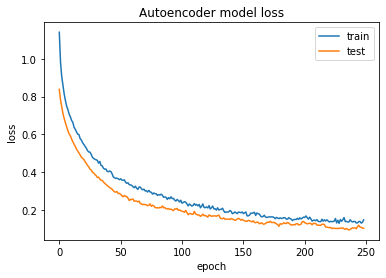

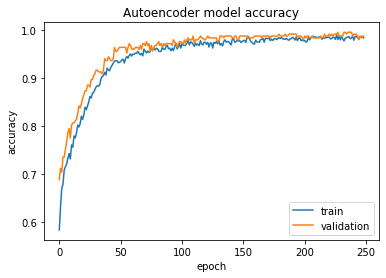

Recall: 0.9782608695652174
Precision: 1.0
F-score: 0.989010989010989

acc: mean: 0.99% std: (+/- 0.00%)

f1: mean: 0.98% std: (+/- 0.01%)

rec: mean: 0.96% std: (+/- 0.02%)

prec: mean: 1.00% std: (+/- 0.01%)
---------------------------------------------

pos f1: mean: 0.98% std: (+/- 0.01%)

pos rec: mean: 0.96% std: (+/- 0.02%)

pos prec: mean: 1.00% std: (+/- 0.01%)
[('DCC0204', 'DCC0240'), ('DCC0240', 'DCC0297')]
----------------------------------------------------------------------
----------------------------------------------------------------------

acc: mean: 0.99% std: (+/- 0.00%)

f1: mean: 0.98% std: (+/- 0.00%)

rec: mean: 0.96% std: (+/- 0.00%)

prec: mean: 1.00% std: (+/- 0.00%)


In [79]:
mlp_val(1,df_drugs_enc)

In [80]:
import pandas as pd
Comp_df=pd.read_csv('C:/Users/user/Desktop/DCDB/DataSet/COMPONENTS.txt',delimiter="\t")
Comp_df

,DCC_ID,GENERIC_NAME,CAS_REGISTRY_NUMBER,FORMULA,TYPE,GROUPS,MOLECULAR_WEIGHT,INDICATION,PHARMACOLOGY,ACTION_MECHANISM
0,DCC1838,Methyclothiazide,CAS:135-07-9,C9H11Cl2N3O4S2,small molecule,approved,360.2373,For use in the management of hypertension eith...,A thiazide diuretic with properties similar to...,Methyclothiazide appears to block the active r...
1,DCC0413,Garenoxacin,CAS:194804-75-6,C23H20F2N2O4. CH4SO3. H2O,small molecule,approved,426.41,For the treatment of Gram-positive and Gram-ne...,"Garenoxacin, a des-F(6)-quinolone with a diflu...",NaN
2,DCC0520,Betaine,CAS:107-43-7,C5H11NO2,small molecule,approved,117.1463,Abnormally low levels of potassium,Betaine in chemistry is any neutral chemical c...,This medication is used to treat high levels o...
3,DCC0639,Atrasentan,CAS:173937-91-2,C29H38N2O6. HCl,small molecule,approved,547.0828,Bone pain due to metastatic prostate cancer,"Atrasentan, a selective endothelin A receptor ...",Atrasentan is an experimental drug that is bei...
4,DCC0029,Lovastatin,CAS:75330-75-5,C24H36O5,small molecule,approved,404.5396,For management as an adjunct to diet to reduce...,The primary cause of cardiovascular disease is...,"Lovastatin is structurally similar to the HMG,..."
...,...,...,...,...,...,...,...,...,...,...
899,DCC0239,Salmeterol,CAS:89365-50-4,C25H37NO4,small molecule,approved,415.5656,For the treatment of asthma and chronic obstru...,Salmeterol is a long acting beta2-adrenoceptor...,"Salmeterol's long, lipophilic side chain binds..."
900,DCC0148,Imatinib,CAS:152459-95-5,C29H31N7O,small molecule,approved,493.6027,For the treatment of Philadelphia chromosome p...,Imatinib is an antineoplastic agent used to tr...,Imatinib mesylate is a protein-tyrosine kinase...
901,DCC0149,Triamcinolone,CAS:124-94-7,C21H27FO6,small molecule,approved,394.4339,"Triamcinolone is used to treat allergies, skin...",Triamcinolone and its derivatives are syntheti...,The antiinflammatory actions of corticosteroid...
902,DCC0150,Efavirenz,CAS:154598-52-4,C14H9ClF3NO2,small molecule,approved,315.675,Efavirenz is used along with other medications...,"Efavirenz (dideoxyinosine, ddI) is an oral nuc...","Similar to zidovudine, efavirenz inhibits the ..."


In [85]:
print(Comp_df.loc[Comp_df.DCC_ID=='DCC0204'].GENERIC_NAME)
print(Comp_df.loc[Comp_df.DCC_ID=='DCC0240'].GENERIC_NAME)
print(Comp_df.loc[Comp_df.DCC_ID=='DCC0297'].GENERIC_NAME)
#Fentanyl-Aspirin
#Aspirin-Miconazole

877    Fentanyl
Name: GENERIC_NAME, dtype: object
630    Aspirin
Name: GENERIC_NAME, dtype: object
714    Miconazole
Name: GENERIC_NAME, dtype: object
